## Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)


In [1]:
import numpy as np
import scipy.stats
import pylab as plt

from astropy.stats import median_absolute_deviation
from astroML import stats as astroMLstats

from tqdm import tqdm

In [4]:
n_death = np.arange(0,5)
n_groups = np.array([109,65,22,3,1])

We need to properly normalize the total number of groups:

In [8]:
normalized_groups = n_groups*1/200
np.sum(normalized_groups)

1.0

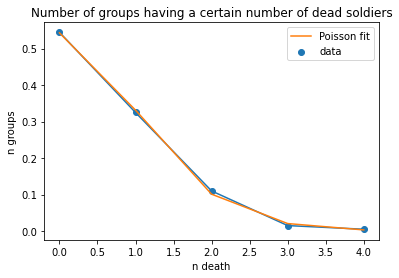

In [33]:
 # weighted mean
mu = np.average(n_death,weights=normalized_groups)

# generating the Poisson distribution and extract data:
Poiss_distr = scipy.stats.poisson(mu=mu)

plt.scatter(n_death,normalized_groups,label='data')
plt.plot(n_death,normalized_groups)
#plt.vlines(mu,min(normalized_groups),max(normalized_groups),color='red',label='weighted mean')
plt.plot(n_death, Poiss_distr.pmf(n_death),label='Poisson fit')

plt.xlabel('n death')
plt.ylabel('n groups')
plt.title('Number of groups having a certain number of dead soldiers')
plt.legend()